In [2]:
import numpy as np
A = np.eye(2) + 0.1*np.array([[-0.1, 2],
                                        [-2, -0.1]])
np.linalg.eig(A)

EigResult(eigenvalues=array([0.99+0.2j, 0.99-0.2j]), eigenvectors=array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        +0.70710678j, 0.        -0.70710678j]]))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
# 目标方差
target_variance = 0.01

# 函数用于计算给定 alpha 和 beta 的方差
def compute_variance(alpha, beta_param):
    return (alpha * beta_param) / ((alpha + beta_param)**2 * (alpha + beta_param + 1))

def find_parameters_for_variance(target_variance):
    max_value = 10  # 假设最大值为 10
    step = 0.1
    min_diff = float('inf')
    best_alpha, best_beta = 0, 0
    
    for alpha in np.arange(0, max_value, step):  # 从大到小递减 alpha
        for beta_param in np.arange(max_value, 0, -step):  # 从大到小递减 beta
            variance = compute_variance(alpha, beta_param)
            diff = abs(variance - target_variance)
            if diff < min_diff:
                min_diff = diff
                best_alpha, best_beta = alpha, beta_param
                
    return best_alpha, best_beta

# 找到符合方差要求的 alpha 和 beta
alpha, beta_param = find_parameters_for_variance(target_variance)
alpha, beta_param

(0.8, 7.20000000000001)

0.00042784409361228766


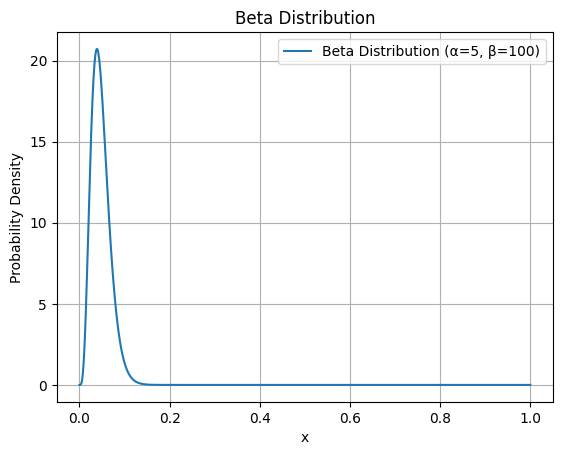

In [6]:


# 设置 Beta 分布的参数
alpha = 5  # 形状参数 alpha
beta_param = 100  # 形状参数 beta

variance = (alpha * beta_param) / ((alpha + beta_param)**2 * (alpha + beta_param + 1))
print(variance)

# 创建 x 值范围
x = np.linspace(0, 1, 1000)

# 计算 Beta 分布的概率密度函数（PDF）
y = beta.pdf(x, alpha, beta_param)

# 绘制 Beta 分布图像
plt.plot(x, y, label=f'Beta Distribution (α={alpha}, β={beta_param})')
plt.title('Beta Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# import sympy as sp

# # height = 50
# # 定义符号变量
# px, dpx, py = sp.symbols('px dpx py')

# # 定义 h(x) 函数
# def h(px, dpx, py):
#     y1 = sp.sqrt(px**2 + py**2)
#     y2 = sp.atan2(py, px)
#     return sp.Matrix([y1, y2])

# # 计算雅可比矩阵
# h_matrix = h(px, dpx, py)
# jacobian_matrix = h_matrix.jacobian([px, dpx, py])

# # 打印雅可比矩阵
# sp.pprint(jacobian_matrix)